In [1]:
import pandas as pd
import numpy as np

from data import *

## Загружаем номер предложения, номер примера парафраза для предложения и оценку для данной пары

In [2]:
labels = load_pkl('stats/new_labels.pkl')

In [3]:
print(f'Размер датасета: {sum(len(value) for value in labels.values())}')

Размер датасета: 278


In [4]:
data = [[key, data[0], data[1]] for key in labels for data in labels[key]]

In [5]:
df = pd.DataFrame(data=data, columns=('sent', 'para', 'label'))

In [6]:
df.head()

,sent,para,label
0,82771,3,7.0
1,82771,24,10.0
2,82771,15,9.0
3,82771,18,2.0
4,24820,4,9.0


In [7]:
df.label.value_counts()

7.0     57
8.0     46
6.0     40
0.0     31
9.0     30
4.0     18
5.0     18
1.0     13
3.0      9
10.0     8
2.0      5
7.3      1
6.5      1
7.5      1
Name: label, dtype: int64

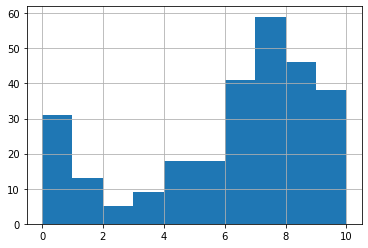

In [8]:
df.label.hist()

## Загрузим признаки

In [9]:
stats = load_pkl('stats/stats.pkl')

In [10]:
list(stats.keys())

['bleu', 'rouge-l', 'wmd', 'pos', 'rouge-1', 'rouge-2']

In [11]:
sent, para = df.sent, df.para
for key in stats.keys():
    df[key] = [stats[key][sent.iloc[i]][para.iloc[i]] for i in range(len(df))]

In [12]:
df.head()

,sent,para,label,bleu,rouge-l,wmd,pos,rouge-1,rouge-2
0,82771,3,7.0,48.762546,0.734177,1.067048,3.102178,0.756098,0.550000
1,82771,24,10.0,47.346550,0.607595,1.055076,3.102178,0.780488,0.575000
2,82771,15,9.0,49.978468,0.650000,0.747549,3.102178,0.829268,0.625000
3,82771,18,2.0,42.287164,0.602410,1.115363,1.034059,0.804878,0.550000
4,24820,4,9.0,56.111216,0.750000,0.800583,3.006511,0.800000,0.714286


## Добавим Quality Estimation features

In [13]:
quality = load_pkl('stats/quality_df_200000.pkl')

In [14]:
for key in quality[0]:
    df[key] = [q[key] for q in quality]

In [15]:
df.head()

,sent,para,label,bleu,rouge-l,wmd,pos,rouge-1,rouge-2,Compression ratio,Sentence splits,Levenshtein similarity,Exact copies,Additions proportion,Deletions proportion,Lexical complexity score
0,82771,3,7.0,48.762546,0.734177,1.067048,3.102178,0.756098,0.550000,0.961207,1.0,0.848352,0.0,0.227273,0.295455,9.222132
1,82771,24,10.0,47.346550,0.607595,1.055076,3.102178,0.780488,0.575000,0.965517,1.0,0.631579,0.0,0.250000,0.340909,8.813677
2,82771,15,9.0,49.978468,0.650000,0.747549,3.102178,0.829268,0.625000,0.982759,1.0,0.639130,0.0,0.227273,0.295455,8.441575
3,82771,18,2.0,42.287164,0.602410,1.115363,1.034059,0.804878,0.550000,1.073276,1.0,0.619543,0.0,0.266667,0.244444,8.866849
4,24820,4,9.0,56.111216,0.750000,0.800583,3.006511,0.800000,0.714286,1.105263,1.0,0.810000,0.0,0.277778,0.166667,8.445822


## Удaлим ненужные столбцы

In [16]:
sent, para = df.sent, df.para

In [17]:
df = df.drop(['sent', 'para', 'Compression ratio', 'Sentence splits', 'Exact copies', 'Lexical complexity score'] ,axis=1)

In [18]:
df.head()

,label,bleu,rouge-l,wmd,pos,rouge-1,rouge-2,Levenshtein similarity,Additions proportion,Deletions proportion
0,7.0,48.762546,0.734177,1.067048,3.102178,0.756098,0.550000,0.848352,0.227273,0.295455
1,10.0,47.346550,0.607595,1.055076,3.102178,0.780488,0.575000,0.631579,0.250000,0.340909
2,9.0,49.978468,0.650000,0.747549,3.102178,0.829268,0.625000,0.639130,0.227273,0.295455
3,2.0,42.287164,0.602410,1.115363,1.034059,0.804878,0.550000,0.619543,0.266667,0.244444
4,9.0,56.111216,0.750000,0.800583,3.006511,0.800000,0.714286,0.810000,0.277778,0.166667


In [19]:
df.describe()

,label,bleu,rouge-l,wmd,pos,rouge-1,rouge-2,Levenshtein similarity,Additions proportion,Deletions proportion
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,5.720504,44.915571,0.719310,0.833854,1.136251,0.760827,0.575301,0.811395,0.233643,0.244615
std,2.889963,25.195414,0.164685,0.589100,1.946484,0.154199,0.215261,0.119995,0.146008,0.147038
min,0.000000,0.000000,0.111111,0.000000,0.000000,0.129032,0.000000,0.421053,0.000000,0.000000
25%,4.000000,27.343140,0.613030,0.412904,0.000000,0.666667,0.428571,0.736842,0.125000,0.134091
50%,7.000000,45.561645,0.733755,0.745893,0.000000,0.769231,0.571429,0.833333,0.211324,0.233032
75%,8.000000,62.891961,0.846154,1.190179,1.612747,0.875000,0.714286,0.902296,0.312500,0.346154
max,10.000000,100.000000,1.000000,3.238264,10.380987,1.000000,1.000000,1.000000,0.760000,0.875000


## Сохраним датасет

In [20]:
y = df.label

In [21]:
df = df.drop(['label'], axis=1)

In [22]:
save_pkl(y, 'stats/y.pkl')

In [23]:
save_pkl(df, 'stats/X.pkl')

In [24]:
save_pkl(sent, 'stats/sent.pkl')

In [25]:
save_pkl(para, 'stats/para.pkl')